<a href="https://colab.research.google.com/github/genagma/stock-markets-analytics-zoomcamp-workspace/blob/main/notebooks/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# install main library YFinance
!pip install yfinance

In [3]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

import time
from datetime import date

# Question 1: [Macro] Average growth of GDP in 2023
**What is the average growth (in %) of GDP in 2023?**

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [4]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=21
Period for indexes: 1954-04-21 to 2024-04-21 


In [5]:
# Real Gross Domestic Product (GDPC1)
# https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [6]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(1)-1
gdpc1['gdpc1_us_2023_avg'] = (gdpc1['gdpc1_us_yoy'].loc['20230101':'20231231'].mean()*100).round(1)

gdpc1.tail()

,GDPC1,gdpc1_us_yoy,gdpc1_us_qoq,gdpc1_us_2023_avg
DATE,,,,
2022-10-01,21989.981,0.006517,0.006354,2.5
2023-01-01,22112.329,0.017179,0.005564,2.5
2023-04-01,22225.350,0.023825,0.005111,2.5
2023-07-01,22490.692,0.029269,0.011939,2.5
2023-10-01,22679.255,0.031345,0.008384,2.5


# Question 2. [Macro] Inverse "Treasury Yield"
**Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.**

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [7]:
# https://fred.stlouisfed.org/series/DGS2
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs2.tail()

,DGS2
DATE,
2024-04-12,4.88
2024-04-15,4.93
2024-04-16,4.97
2024-04-17,4.93
2024-04-18,4.98


In [8]:
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail()

,DGS10
DATE,
2024-04-12,4.50
2024-04-15,4.63
2024-04-16,4.67
2024-04-17,4.59
2024-04-18,4.64


In [9]:
dsg_2_10 = dgs2.join(dgs10,  on='DATE')
dsg_2_10.tail()

,DGS2,DGS10
DATE,,
2024-04-12,4.88,4.50
2024-04-15,4.93,4.63
2024-04-16,4.97,4.67
2024-04-17,4.93,4.59
2024-04-18,4.98,4.64


In [10]:
dsg_2_10['ds10-dgs2'] = dsg_2_10['DGS2'] - dsg_2_10['DGS10']
dsg_2_10.tail()

,DGS2,DGS10,ds10-dgs2
DATE,,,
2024-04-12,4.88,4.50,0.38
2024-04-15,4.93,4.63,0.30
2024-04-16,4.97,4.67,0.30
2024-04-17,4.93,4.59,0.34
2024-04-18,4.98,4.64,0.34


In [11]:
(dsg_2_10['ds10-dgs2'].loc['20000101':].min()).round(1)

-2.9

# Question 3. [Index] Which Index is better recently?

**Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)**

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)



In [20]:
# INDEXES from Yahoo Finance
# S&P 500 Index
# WEB:  https://finance.yahoo.com/quote/%5EGSPC/
gspc_daily = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [22]:
gspc_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,5149.669922,5168.430176,5052.470215,5061.819824,5061.819824,3950210000
2024-04-16,5064.589844,5079.839844,5039.830078,5051.410156,5051.410156,4006200000
2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,5022.209961,3596130000
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000


In [24]:
# normally 252 trading days
gspc_daily['adj_close_last_year'] = gspc_daily['Adj Close'].shift(252)
gspc_daily['yoy_growth'] = gspc_daily['Adj Close'] / gspc_daily['adj_close_last_year'] -1

In [25]:
gspc_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,NaN,NaN
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,NaN,NaN
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,NaN,NaN
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-15,5149.669922,5168.430176,5052.470215,5061.819824,5061.819824,3950210000,4146.220215,0.220828
2024-04-16,5064.589844,5079.839844,5039.830078,5051.410156,5051.410156,4006200000,4137.640137,0.220843
2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,5022.209961,3596130000,4151.319824,0.209786


<Axes: xlabel='Date'>

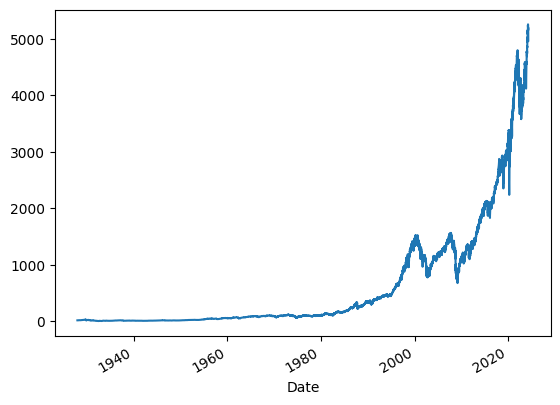

In [26]:
gspc_daily['Adj Close'].plot.line()

In [27]:
# IPC Mexico Index
# WEB:  https://finance.yahoo.com/quote/%5EMXX/
ipc_daily = yf.download(tickers = "^MXX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [28]:
ipc_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,56536.468750,56709.121094,55924.101562,55984.000000,55984.000000,170645700
2024-04-16,56009.730469,56148.000000,55626.750000,55797.250000,55797.250000,225862900
2024-04-17,55788.738281,56090.320312,55383.250000,55415.691406,55415.691406,244258900
2024-04-18,55597.789062,55941.621094,55585.820312,55739.429688,55739.429688,208671900
2024-04-19,55811.191406,56036.718750,55579.691406,55862.851562,55862.851562,138617600


In [29]:
# normally 252 trading days
ipc_daily['adj_close_last_year'] = ipc_daily['Adj Close'].shift(252)
ipc_daily['yoy_growth'] = ipc_daily['Adj Close'] / ipc_daily['adj_close_last_year'] -1

In [30]:
ipc_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
1991-11-08,1418.800049,1418.800049,1418.800049,1418.800049,1418.800049,0,NaN,NaN
1991-11-11,1416.900024,1416.900024,1416.900024,1416.900024,1416.900024,0,NaN,NaN
1991-11-12,1445.400024,1445.400024,1445.400024,1445.400024,1445.400024,0,NaN,NaN
1991-11-13,1453.400024,1453.400024,1453.400024,1453.400024,1453.400024,0,NaN,NaN
1991-11-14,1459.300049,1459.300049,1459.300049,1459.300049,1459.300049,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-15,56536.468750,56709.121094,55924.101562,55984.000000,55984.000000,170645700,54695.781250,0.023552
2024-04-16,56009.730469,56148.000000,55626.750000,55797.250000,55797.250000,225862900,54460.058594,0.024554
2024-04-17,55788.738281,56090.320312,55383.250000,55415.691406,55415.691406,244258900,54778.929688,0.011624


<Axes: xlabel='Date'>

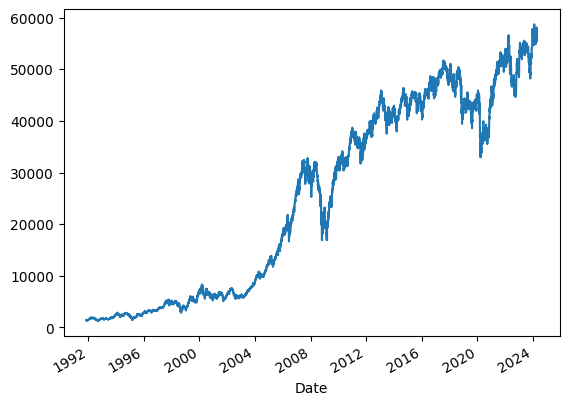

In [31]:
ipc_daily['Adj Close'].plot.line()

In [36]:
# prompt: Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write

# Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/).
# Compare 5Y growth for both (between 2019-04-09 and 2024-04-09).
# Select the higher growing index and write down the growth in % (closest integer %).
# E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

# S&P 500 Index
# WEB:  https://finance.yahoo.com/quote/%5EGSPC/
gspc_daily = yf.download(tickers = "^GSPC",
                     start = '2019-04-09',
                     end = '2024-04-09',
                     interval = "1d")

# IPC Mexico Index
# WEB:  https://finance.yahoo.com/quote/%5EMXX/
ipc_daily = yf.download(tickers = "^MXX",
                     start = '2019-04-09',
                     end = '2024-04-09',
                     interval = "1d")

# Calculate 5Y growth for both indexes
gspc_5y_growth = (gspc_daily['Adj Close'][-1] / gspc_daily['Adj Close'][0] - 1) * 100
ipc_5y_growth = (ipc_daily['Adj Close'][-1] / ipc_daily['Adj Close'][0] - 1) * 100

# Select the higher growing index and write down the growth in % (closest integer %)
if gspc_5y_growth > ipc_5y_growth:
    print(f"S&P 500 grew more than IPC Mexico in the past 5 years, with a growth of {round(gspc_5y_growth)}%")
else:
    print(f"IPC Mexico grew more than S&P 500 in the past 5 years, with a growth of {round(ipc_5y_growth)}%")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

S&P 500 grew more than IPC Mexico in the past 5 years, with a growth of 81%
